### 開始構建CNN，對fruits數據集進行多類分類，共有69,908個圖像，
分為兩個文件夾 : 
1. 訓練集 : 52,262 個圖像
2. 測試集 : 17,540 個圖像
圖像的大小為100 * 100. 總共有101類水果。

In [1]:
# 將圖片檔名及目標標籤載到numpy數組陣列中！
from sklearn.datasets import load_files
import numpy as np

train_dir = './fruits-360/Training'
test_dir = './fruits-360/Test'


def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Loading complete!
Training set size :  52262
Testing set size :  17540


In [2]:
# 檢視圖像檔案及標籤
x_train, y_train

(array(['./fruits-360/Training\\Tomato 2\\134_100.jpg',
        './fruits-360/Training\\Cherry Wax Black\\r_9_100.jpg',
        './fruits-360/Training\\Apple Braeburn\\180_100.jpg', ...,
        './fruits-360/Training\\Pomegranate\\260_100.jpg',
        './fruits-360/Training\\Quince\\45_100.jpg',
        './fruits-360/Training\\Apple Granny Smith\\r_177_100.jpg'],
       dtype='<U55'), array([95, 25,  0, ..., 83, 85,  5]))

In [3]:
# 確認水果種類數量
no_of_classes = len(np.unique(y_train))
no_of_classes

101

In [4]:
# 更改為101個單位向量
print(y_train[0:10])

[95 25  0 68 53 82 33 82 45 63]


In [5]:
from keras.models import model_from_json
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes) # 將類向量（整數）轉換為二進制類矩陣 one hot encoding
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0] 

Using TensorFlow backend.


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

In [6]:
# 將驗證資料劃分為測試和驗證標籤
x_test,x_valid = x_test[7000:],x_test[:7000]
y_test,y_vaild = y_test[7000:],y_test[:7000]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 101)
Test X :  (10540,)
Test y :  (10540, 101)


In [7]:
x_train[0]
# 訓練數據只是圖像檔名，需要將它們轉換為像素矩陣

'./fruits-360/Training\\Tomato 2\\134_100.jpg'

In [8]:
x_train[1]

'./fruits-360/Training\\Cherry Wax Black\\r_9_100.jpg'

In [9]:
# 將圖像載入和轉入陣列內
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))  # Convert to Numpy Array
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (52262, 100, 100, 3)
Validation set shape :  (7000, 100, 100, 3)
Test set shape :  (10540, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [15]:
print('1st training image as array',x_train[0]) # don't worry if you see only 255s..
# there are elements will other values too :p

1st training image as array [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [16]:
# 將資料線性單位化至  [0,1] 。
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [17]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [18]:
# 可視化前10個訓練圖像！
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [19]:
# 建立CNN神經網路 - 使用3個Conv層，然後是maxpooling層
# 最後添加dropout，flatten和 fully connected layers(Dense)

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

# 建立空的神經網路學習機
model = Sequential()

# 逐層建立神經網路 
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
# model.add(Dense(81,activation = 'softmax'))
model.add(Dense(101,activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
__________

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


## 模型的保存及重用
### 每次訓練結束後回調比對，並保存最好的模型於hdf5。

In [ ]:
batch_size = 30
# 在每個訓練期之後保存模型
filepath="./fruits-360/fruits_weights_best.hdf5" # fruits_weights_best.hdf5
checkpointer = ModelCheckpoint(filepath, verbose = 1, save_best_only = True) 
#checkpointer = ModelCheckpoint(filepath = './fruits-360/cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True) 

history = model.fit(x_train,y_train,
        batch_size = batch_size,
        epochs=30,
        validation_data=(x_valid, y_vaild),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

In [21]:
# 載入產生最佳驗證精度的權重
# model.load_weights('./fruits-360/cnn_from_scratch_fruits.hdf5')
model.load_weights('./fruits-360/fruits_weights_best.hdf5')

In [25]:
from keras.models import load_model
# 加載模型
model = load_model('./fruits-360/fruits_weights_best.hdf5')
# score = model.evaluate (x_test,y_test,verbose = 0)
# print('{}：{：.2％}')
# （'{}：{：.2％}'。 format（model.metrics_names [ 1 ],得分[ 1 ]））

In [26]:
# 估計準確度 損失和準確率
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])
#98% accuracy !!


 Test accuracy: 0.9904174573055028


In [27]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')


測試資料的 loss: 0.06167
測試資料的正確率: 0.9904174573055028


In [38]:
print(history.history.keys())

AttributeError: 'Sequential' object has no attribute 'history'

In [37]:
plt.plot(model.history['acc'])

AttributeError: 'Sequential' object has no attribute 'history'

## 可視化測試預測結果, 隨機抽取測試圖像樣本，並預測標籤和標註數據(ground truth)

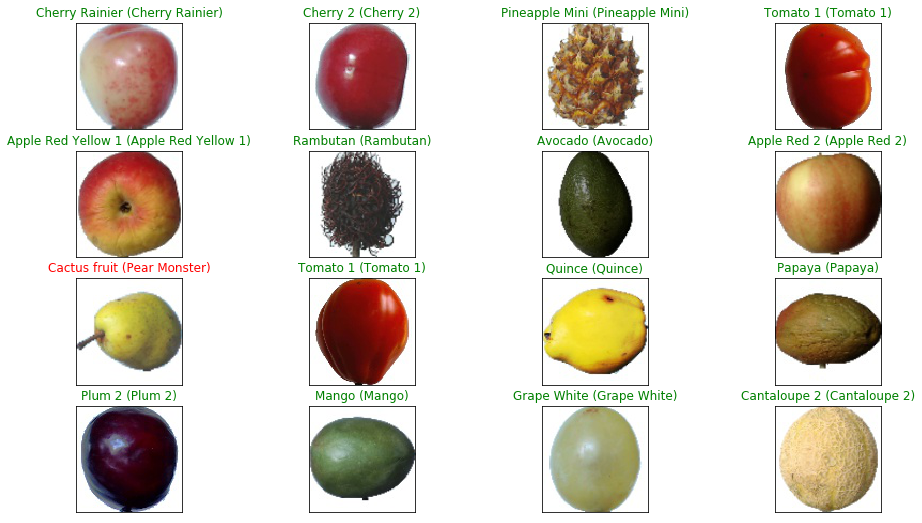

In [29]:
# 可視化測試預測結果
y_pred = model.predict(x_test)
# 隨機抽取測試圖像樣本，並預測標籤和標註數據(ground truth)
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

## 檢視損失率和精準度結果

AttributeError: 'Sequential' object has no attribute 'history'

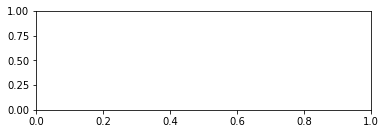

In [35]:
# 檢視損失率和精準度
import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # 準確度結果  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # 損失率結果   
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()